# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [913]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [914]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [915]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [916]:
#your turn
df_all = pd.merge(df_offers, df_transactions)
df_all_1 = df_all.drop(df_all.iloc[:, 1:7], axis=1)
df_all_1.head()

,offer_id,customer_name,n
0,1,Thomas,1
1,1,Jackson,1
2,1,Mitchell,1
3,1,Peterson,1
4,1,Wood,1


In [917]:
df_matrix = pd.pivot_table(df_all, columns = 'offer_id', index = 'customer_name', values = 'n').fillna(0)
df_matrix = df_matrix.reset_index()
df_matrix.head(10)

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [918]:
# check if no. of unique customers matches no. of rows in the matrix
print (df_matrix.shape)
print (len(df_transactions.customer_name.unique()))

(100, 33)
100


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

In [919]:
# your turn
x_cols = df_matrix.iloc[:,1:].values
x_cols

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  1.]])

In [920]:
x_cols.shape

(100L, 32L)

In [921]:
from sklearn.cluster import KMeans

In [922]:
k_range = range(2,11)
kmeans = [KMeans(n_clusters=k).fit(x_cols) for k in k_range]
centroids = [X.cluster_centers_ for X in kmeans]
scores = [X.score(x_cols) for X in kmeans]

In [923]:
# total sum of squares
from scipy.spatial.distance import cdist, pdist
tss = sum(pdist(x_cols)**2)/x_cols.shape[0]

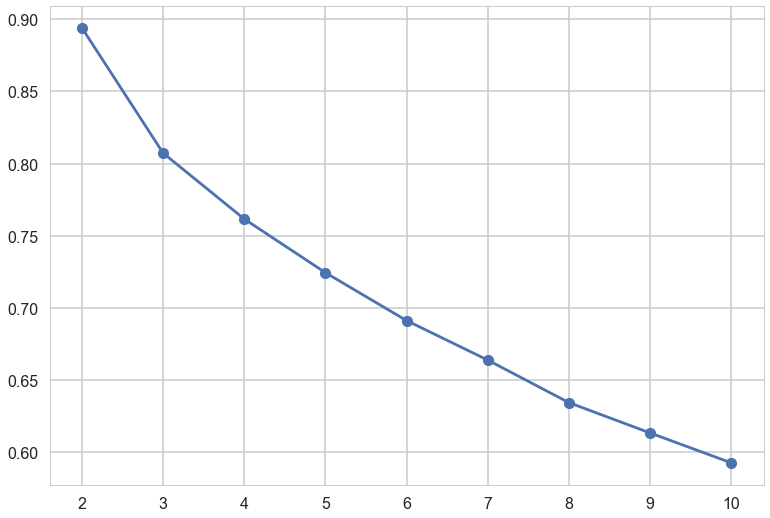

In [924]:
# elbow plot of remaining unexplained variance after clustering (score for the fit / total variance in the data set)
plt.plot(k_range, (scores/-tss), marker='o')

plt.show()

There is no obvisous 'elbow' in the plot and 10 clusters still only explain 40% of the total variance. It looks like a K>10 is needed to make a better fit. In the range of 2<=K<=10, 4, 8, 9 and 10 could be good examined in more detail. 

In [925]:
k=4
cluster = KMeans(n_clusters=k).fit_predict(x_cols)
clusters, counts = np.unique(cluster, return_counts=True)
print ('Clusters: ', clusters)
print ('Counts:   ', counts)

Clusters:  [0 1 2 3]
Counts:    [32 17 35 16]


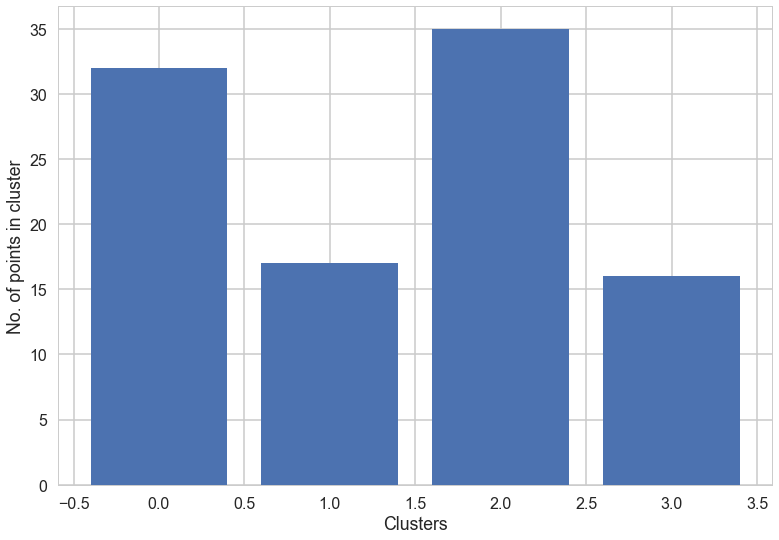

In [926]:
c = clusters
plt.bar(c, counts)
plt.xlabel('Clusters')
plt.ylabel('No. of points in cluster')
plt.show()

In [927]:
KMeans(n_clusters=4).fit(x_cols).score(x_cols)

-215.09843604108312

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.0917487150875


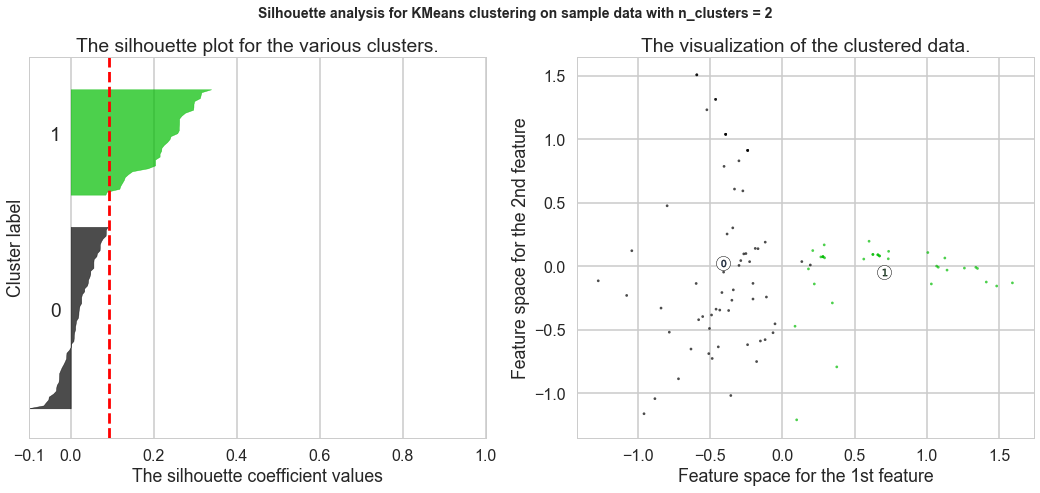

For n_clusters = 3 The average silhouette_score is : 0.12078917343


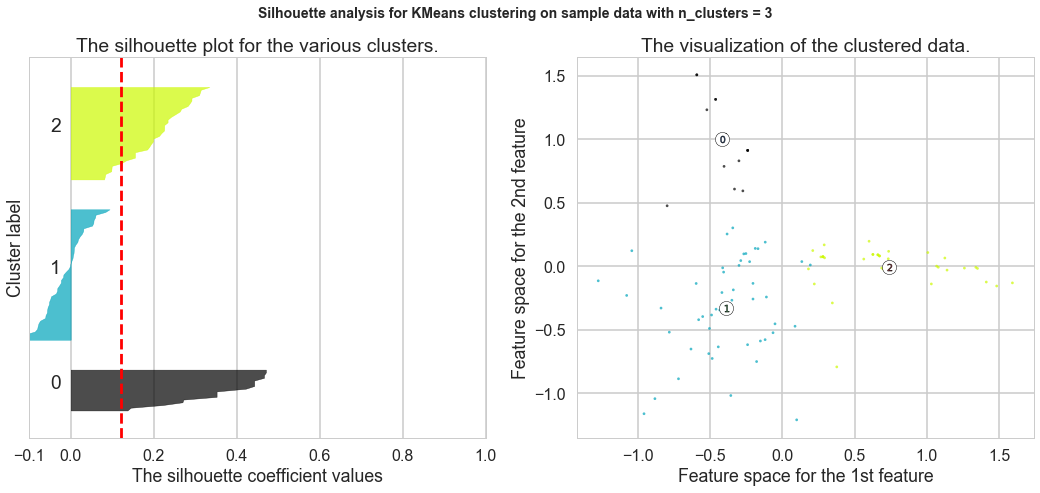

For n_clusters = 4 The average silhouette_score is : 0.137200537815


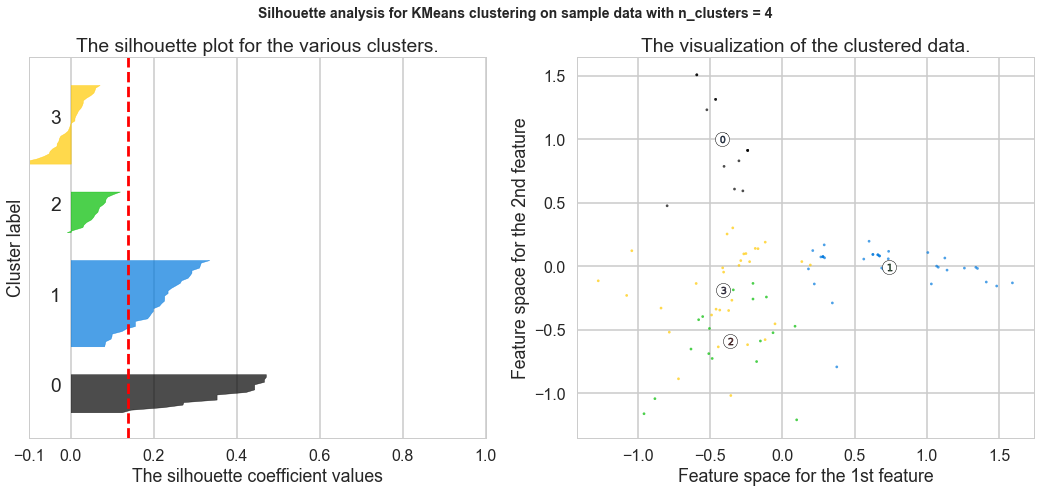

For n_clusters = 5 The average silhouette_score is : 0.107615348849


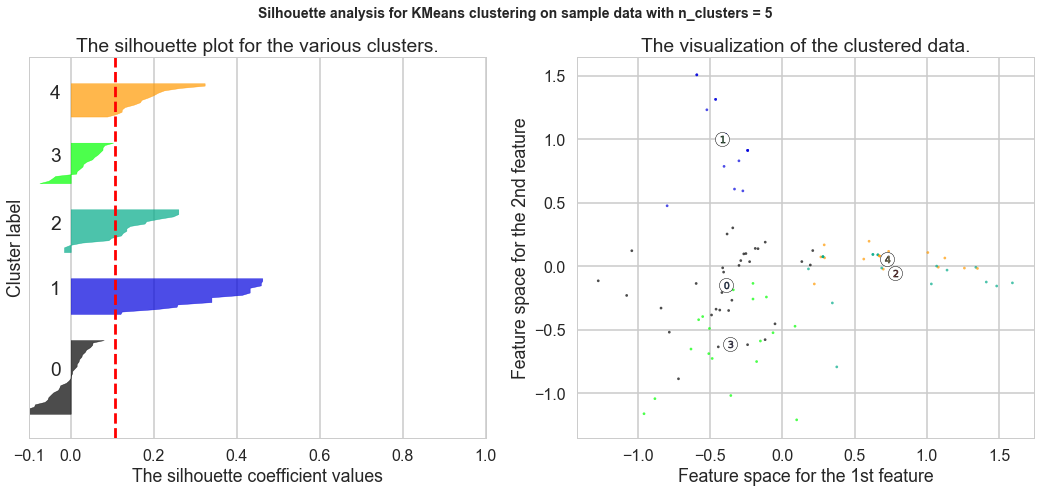

For n_clusters = 6 The average silhouette_score is : 0.128490158655


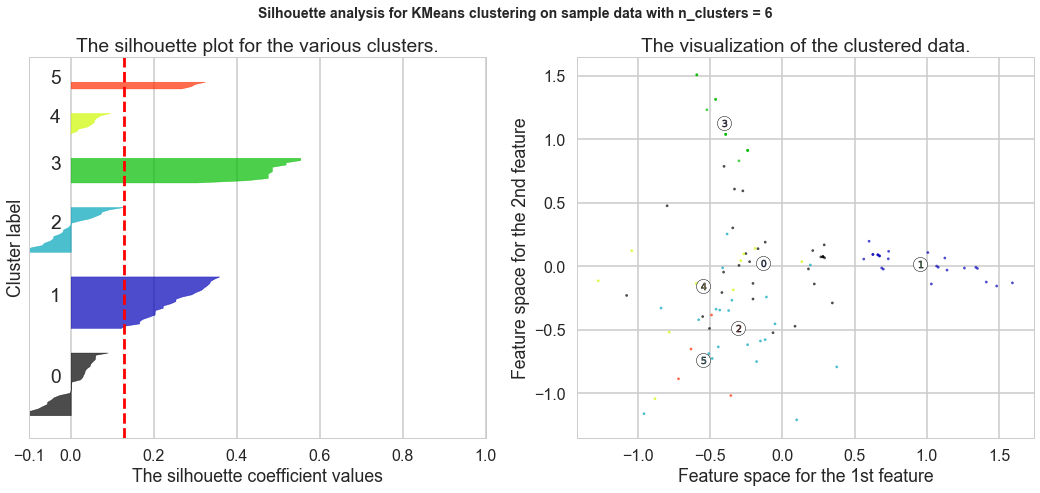

For n_clusters = 7 The average silhouette_score is : 0.119581300145


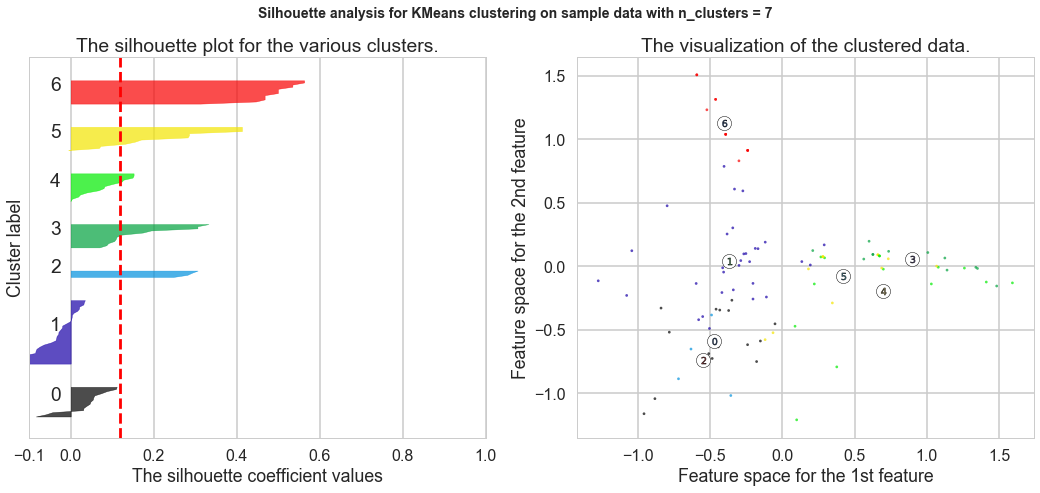

For n_clusters = 8 The average silhouette_score is : 0.141598518221


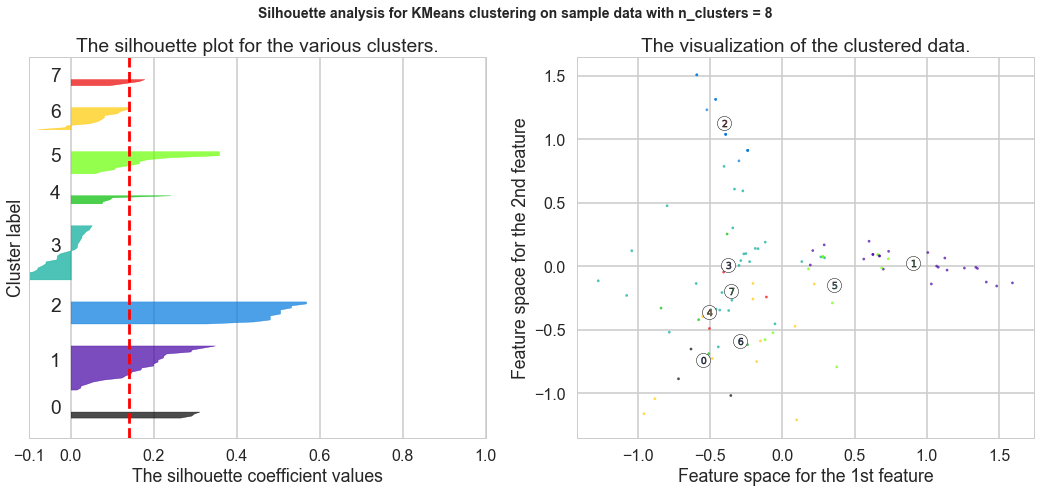

For n_clusters = 9 The average silhouette_score is : 0.120068866765


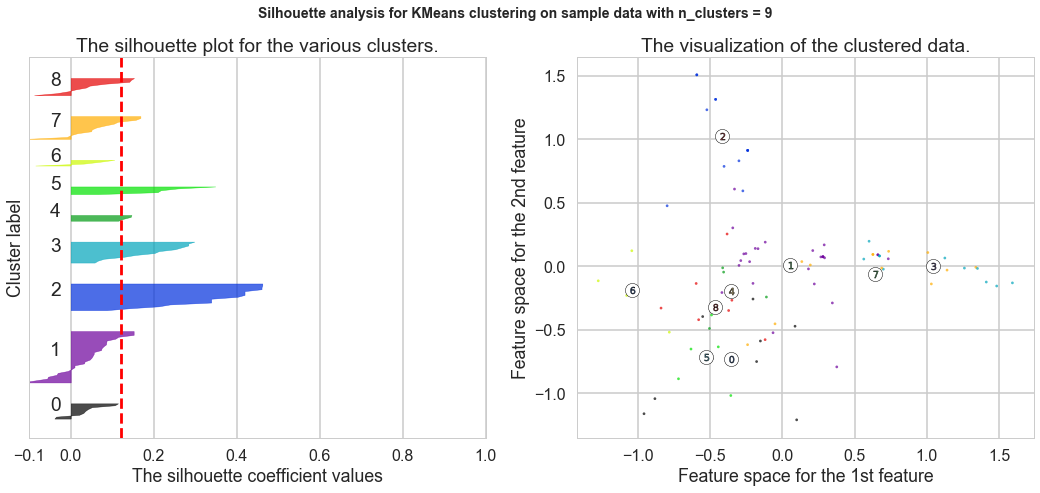

For n_clusters = 10 The average silhouette_score is : 0.127071516162


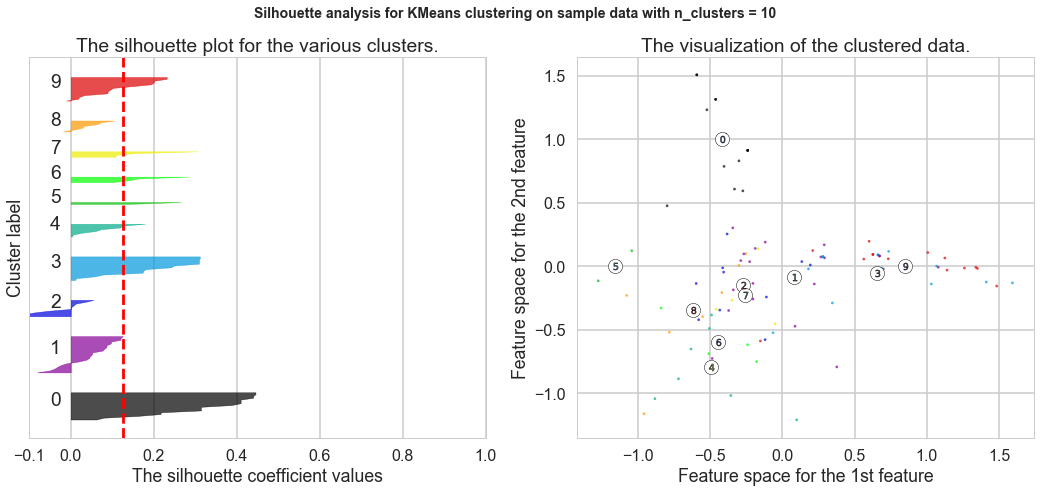

In [928]:
# Your turn.
from __future__ import print_function

from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import numpy as np

print(__doc__)

dr = PCA(n_components=2)
X = dr.fit_transform(x_cols)

range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(x_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = dr.transform(clusterer.cluster_centers_)
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [929]:
X.shape

(100L, 2L)

From the analysis of silhouette scores and plots, the following conslusions can be made:
- there does not seem to be a strong pattern in the data (as indicated by the elbow plot which did not yield good results)
- there are two well-defined clusters, one in the upper left quadrant and one along the positive x-axis; the points in the lower left quadrant are scattered and hard to cluster visually
- K=4 gives a silhouette score of 0.13 and picks up the two well-defined clusters 
- K=10 gives a silhouette score of 0.13 (the highest for K>4), however most of the clusters are small and visually do not form well-defined groups

Subjectively I would choose K=4 as a robust and visually seems most intuitive clustering solution.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [930]:
#your turn
from sklearn.decomposition import PCA

In [931]:
# define K, return clusters and cluster centers
k=4
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(x_cols)
centroids = kmeans.cluster_centers_

# PCA on original matrix and cluster centers for 2-D plotting
pca = PCA(n_components=2)
result = pca.fit_transform(x_cols)
result_x = result[:,0]
result_y = result[:,1]
clust_centers = pca.transform(centroids)


In [932]:
df_summary = df_matrix[['customer_name']]
df_summary.loc[:,'cluster'] = clusters
df_summary.loc[:, 'PCA_x'] = result_x
df_summary.loc[:, 'PCA_y'] = result_y
df_summary = df_summary.sort_values(by='cluster')
df_summary.head()

offer_id,customer_name,cluster,PCA_x,PCA_y
77,Rogers,0,0.377123,-0.791758
61,Ortiz,0,0.281381,0.075254
54,Morales,0,0.099501,-1.208376
98,Wright,0,-0.489805,-0.383307
47,Long,0,0.221585,-0.139058


In [933]:
u, ind = np.unique(clusters, return_index=True)
cols = u[np.argsort(ind)]
cols1 = np.unique(clusters)
print (cols)
print (len(clusters))

[1 2 3 0]
100


In [934]:
df_summary.cluster.value_counts()

2    46
1    25
0    16
3    13
Name: cluster, dtype: int64

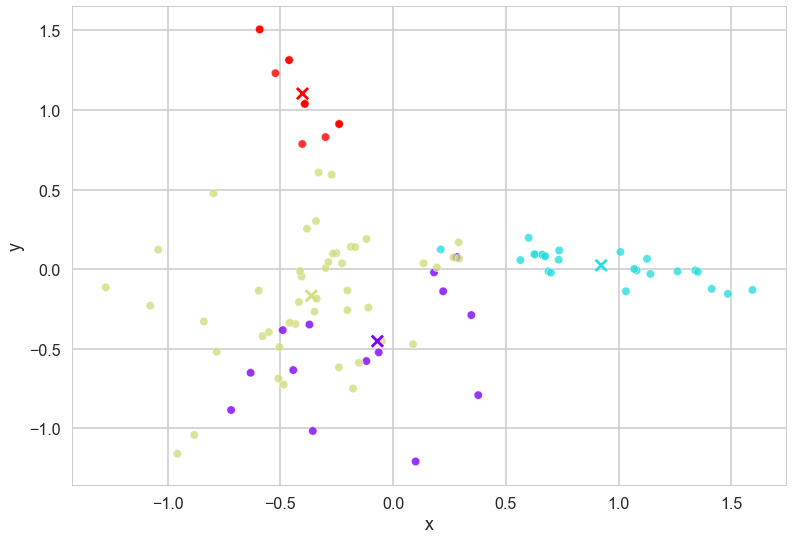

In [935]:
plt.scatter(x=df_summary['PCA_x'], y=df_summary['PCA_y'], c=df_summary['cluster'], cmap='rainbow', alpha = 0.8, edgecolors='w', s=70)
plt.scatter(x=clust_centers[:,0], y=clust_centers[:,1], marker='x', c=range(0,k), cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Again K=4 produces a sensible clustering. There seem to be two clean clusters (red and blue) and the other two overlap sigbificantly. With an increasing K, the overlap becomes more pronounced and it is difficult to visually consider them as clusters in this 2-D visualization. 
In terms of methods for choosing K, the silhouette plot provides a strong metric to start with and is confirmed by the PCA visualizaion. In this case the elbow plot did not hel in choosing a value for K, but it did point to a low level of clustering in teh dataset.

### Discussion of the original data set 

In [936]:
df_all_1.head()

,offer_id,customer_name,n
0,1,Thomas,1
1,1,Jackson,1
2,1,Mitchell,1
3,1,Peterson,1
4,1,Wood,1


In [937]:
# add cluster ID to the original data frame
df_all_2 = df_all.merge(df_summary)
df_all_2 = df_all_2.drop(df_all_2.loc[:, ['PCA_x', 'PCA_y']], axis=1)
df_all_2.head(20)

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n,cluster
0,1,January,Malbec,72,56,France,False,Thomas,1,2
1,4,February,Champagne,72,48,France,True,Thomas,1,2
2,9,April,Chardonnay,144,57,Chile,False,Thomas,1,2
3,11,May,Champagne,72,85,France,False,Thomas,1,2
4,14,June,Merlot,72,64,Chile,False,Thomas,1,2
5,26,October,Pinot Noir,144,83,Australia,False,Thomas,1,2
6,1,January,Malbec,72,56,France,False,Jackson,1,2
7,2,January,Pinot Noir,72,17,France,False,Jackson,1,2
8,11,May,Champagne,72,85,France,False,Jackson,1,2
9,15,June,Cabernet Sauvignon,144,19,Italy,False,Jackson,1,2


In [938]:
# examine orders by variety
varieties = pd.pivot_table(df_all_2, columns = 'cluster', index = 'varietal', values = 'n', aggfunc='sum')
varieties.loc[:,'total'] = varieties.sum(axis=1)
varieties.loc['All_varieties', :] = varieties.sum(axis=0)
varieties

cluster,0,1,2,3,total
varietal,,,,,
Cabernet Sauvignon,NaN,NaN,32.0,NaN,32.0
Champagne,27.0,1.0,53.0,NaN,81.0
Chardonnay,NaN,NaN,15.0,NaN,15.0
Espumante,16.0,23.0,1.0,NaN,40.0
Malbec,NaN,16.0,16.0,NaN,32.0
Merlot,NaN,6.0,14.0,NaN,20.0
Pinot Grigio,NaN,15.0,2.0,NaN,17.0
Pinot Noir,NaN,NaN,11.0,33.0,44.0
Prosecco,13.0,12.0,18.0,NaN,43.0


In [939]:
# examine discounts
discounts = pd.pivot_table(df_all_2, columns = 'cluster', index = 'varietal', values = 'discount', aggfunc='mean')
discounts.loc[:,'total'] = discounts.mean(axis=1)
discounts.loc['All_varieties', :] = discounts.mean(axis=0)
discounts

cluster,0,1,2,3,total
varietal,,,,,
Cabernet Sauvignon,NaN,NaN,51.625000,NaN,51.625000
Champagne,68.851852,50.000000,74.150943,NaN,64.334265
Chardonnay,NaN,NaN,51.000000,NaN,51.000000
Espumante,40.437500,47.608696,50.000000,NaN,46.015399
Malbec,NaN,54.000000,55.250000,NaN,54.625000
Merlot,NaN,43.000000,72.571429,NaN,57.785714
Pinot Grigio,NaN,87.000000,87.000000,NaN,87.000000
Pinot Noir,NaN,NaN,53.000000,47.545455,50.272727
Prosecco,66.615385,40.000000,68.055556,NaN,58.223647


In [940]:
# a more detailed analysis of orders by cluster: origin, month and variety; quantity and number of orders
countries = pd.pivot_table(df_all_2, columns = 'cluster', index = ['origin' ,'varietal', 'campaign'], values = ['n', 'min_qty'], aggfunc='sum')
countries

min_qty                          n  \
cluster                                         0     1       2       3    0   
origin       varietal           campaign                                       
Australia    Pinot Noir         October       NaN   NaN   864.0  1296.0  NaN   
             Prosecco           March        24.0  72.0    18.0     NaN  4.0   
                                May           NaN   NaN   360.0     NaN  NaN   
California   Champagne          August       24.0  12.0    12.0     NaN  2.0   
             Merlot             June          NaN   NaN   360.0     NaN  NaN   
             Prosecco           April       144.0   NaN   360.0     NaN  2.0   
Chile        Chardonnay         April         NaN   NaN  1440.0     NaN  NaN   
             Merlot             June          NaN   NaN   648.0     NaN  NaN   
                                May           NaN  36.0     NaN     NaN  NaN   
             Prosecco           March      1008.0   NaN   720.0     NaN  7.0   
France       Cabernet Sauvignon November      NaN   NaN    72.0     NaN  NaN   
             Champagne          August      504.0   NaN  1008.0     NaN  7.0   
                                December    216.0   NaN  1008.0     NaN  3.0   
                                February    360.0   NaN   504.0     NaN  5.0   
                                May          72.0   NaN   864.0     NaN  1.0   
             Malbec             December      NaN  96.0    36.0     NaN  NaN   
                                January       NaN   NaN   720.0     NaN  NaN   
             Pinot Grigio       November      NaN  90.0    12.0     NaN  NaN   
             Pinot Noir         January       NaN   NaN   360.0   360.0  NaN   
Germany      Cabernet Sauvignon December      NaN   NaN   288.0     NaN  NaN   
             Champagne          July         36.0   NaN    24.0     NaN  3.0   
             Pinot Noir         July          NaN   NaN     NaN    84.0  NaN   
Italy        Cabernet Sauvignon August        NaN   NaN   432.0     NaN  NaN   
                                June          NaN   NaN   864.0     NaN  NaN   
             Pinot Noir         September     NaN   NaN     NaN    72.0  NaN   
New Zealand  Cabernet Sauvignon February      NaN   NaN   576.0     NaN  NaN   
             Champagne          October     432.0   NaN   216.0     NaN  6.0   
Oregon       Cabernet Sauvignon October       NaN   NaN   432.0     NaN  NaN   
             Espumante          February    864.0   NaN     NaN     NaN  6.0   
                                July          6.0  72.0     6.0     NaN  1.0   
South Africa Chardonnay         September     NaN   NaN   720.0     NaN  NaN   
             Espumante          March        54.0  66.0     NaN     NaN  9.0   

                                                             
cluster                                       1     2     3  
origin       varietal           campaign                     
Australia    Pinot Noir         October     NaN   6.0   9.0  
             Prosecco           March      12.0   3.0   NaN  
                                May         NaN   5.0   NaN  
California   Champagne          August      1.0   1.0   NaN  
             Merlot             June        NaN   5.0   NaN  
             Prosecco           April       NaN   5.0   NaN  
Chile        Chardonnay         April       NaN  10.0   NaN  
             Merlot             June        NaN   9.0   NaN  
                                May         6.0   NaN   NaN  
             Prosecco           March       NaN   5.0   NaN  
France       Cabernet Sauvignon November    NaN   6.0   NaN  
             Champagne          August      NaN  14.0   NaN  
                                December    NaN  14.0   NaN  
                                February    NaN   7.0   NaN  
                                May         NaN  12.0   NaN  
             Malbec             December   16.0   6.0   NaN  
                                January     NaN  10.0   NaN  
 

Clusters the orders in detail by origin and month of campaign, the conclusions about clustering can be made about the nature of the clusters:
- cluster 0 consists of customers who ordered a wide range of varieties but are mostly focused on French wine and Champagne in particular
- cluster 1 is focused on 4 specific varieties: Prosecco from Australia, Malbec from France, Pinot Grigio from France, and Espumante from Oregon as well as South Africa
- cluster 2 is the largest cluster with all varieties included, in particular large orders of Cabernet Sauvignon, Champagne, Chardonnay and Prosecco. This cluster also has the highest average discount and the largest overall number of orders - this is a group that is price-driven, with large volume and the broadest choice of wine.
- Cluster 3 is focused on Pinot Noir from Australia, France and Italy. This group can be considered Pinot Noir specialists, with minor additional orders of Prosecco, Champagne and Chardonnay.

With respect to the discounting structire, it can be concluded that some varieties require a higher discount than others (Pinot Noir 40, and Pinot Grigio 87).

Further, some varieties are heavily seasonal (e.g. Malbec in December/January and Merlot in May/June) while others such as Champagne and Cabernet Sauvingnon are sold throughout the year.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

In [941]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition

pca = sklearn.decomposition.PCA()
y = pca.fit(x_cols).explained_variance_ratio_
x = range(1,len(y)+1)


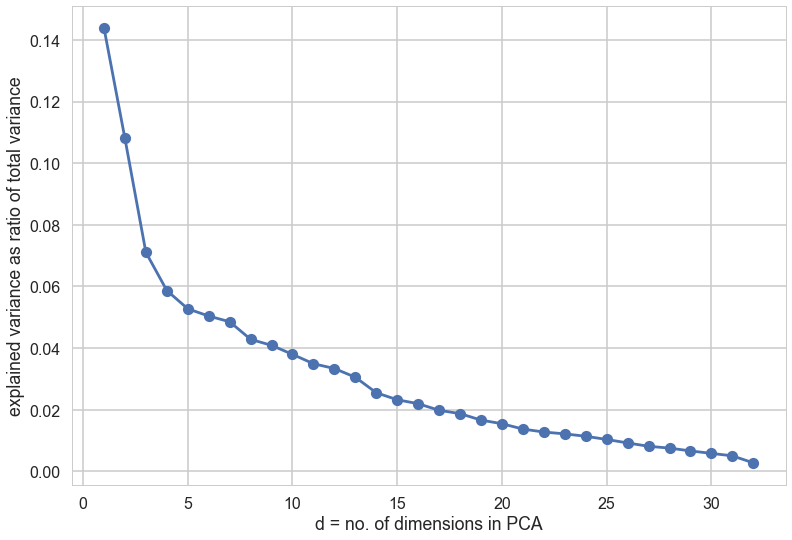

In [942]:
plt.plot(x, y, marker='o')
plt.xlabel('d = no. of dimensions in PCA')
plt.ylabel('explained variance as ratio of total variance')
plt.show()

At d=5 the curve starts to flatten and  this could be a possible value for the PCA. 

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


### Affinity Propagation 

In [943]:
# Import Affinity Propagation module

from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation(damping=0.5)
ap_clusters = ap.fit_predict(x_cols)
clust, count = np.unique(ap_clusters, return_counts=True)
print (zip(clust, count))
# silhouette coefficient
print("Silhouette Coefficient: %0.3f" % silhouette_score(x_cols, ap_clusters))
print (ap.cluster_centers_indices_)

[(0, 9), (1, 3), (2, 6), (3, 11), (4, 7), (5, 3), (6, 10), (7, 11), (8, 4), (9, 3), (10, 8), (11, 5), (12, 12), (13, 8)]
Silhouette Coefficient: 0.123
[ 0 19 20 30 32 35 41 42 45 68 69 70 74 76]


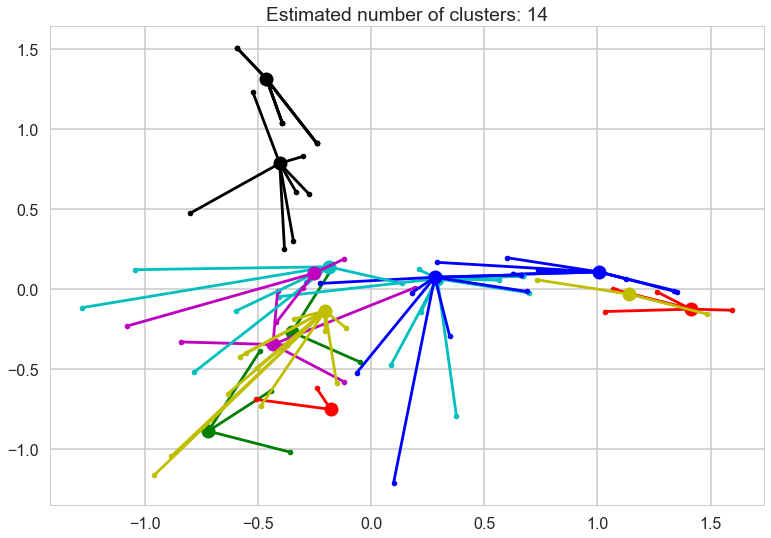

In [944]:
# Plot result - from scikit learn demo
from itertools import cycle
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.pyplot import cm 

plt.close('all')
plt.figure(1)
plt.clf()

dim_red = PCA(n_components=2)
X = dim_red.fit_transform(x_cols)
                            
cluster_centers_indices = ap.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = ap.labels_

colors = cycle('bgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], col, markersize=14, marker='o', markerfacecolor=col, markeredgecolor='k')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], c=col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

The key item for this algorithm was to tune the damping factor (must be between 0.5 and strictly less than 1). The default factor of 0.5 produces 14 clusters and a silhouette factor of 0.12. Increasing the damping eventually reduces the number of clusters to 11 but worsens the silhouette score. 
Ultimately the KMeans method produces a better fit with only 4 clusters.

### Spectral clustering

In [945]:
from sklearn.cluster import SpectralClustering

n=5
sc = SpectralClustering(n_clusters=n, gamma = 0.001)
sc_clusters = sc.fit_predict(x_cols)
clust, count = np.unique(sc_clusters, return_counts=True)
print(zip(clust, count))
print("Silhouette Coefficient: %0.3f" % silhouette_score(x_cols, sc_clusters))

[(0, 13), (1, 23), (2, 17), (3, 32), (4, 15)]
Silhouette Coefficient: 0.138


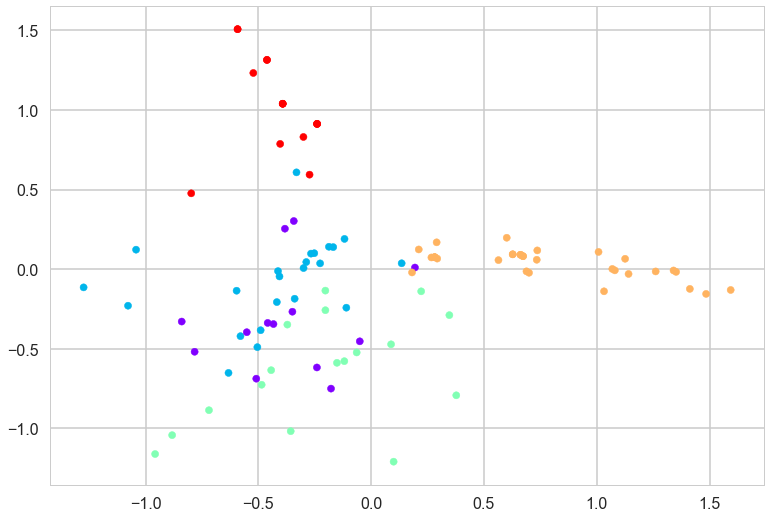

In [946]:
plt.scatter(x=result_x, y=result_y, c=sc.labels_, cmap='rainbow', s=50)
plt.show()

Spectral clustering produces the highest silhouette score at 3 clusters, though still low at 0.1. With an increasing number of clusters, the method fits the majority of data points into one cluster and breaks down the other clusters.
Reduces the value of gamma to 0.01 (default = 1.0) produces marginally better results. The best score achieved using different affinity functions and parameters was silhouette score of 0.14 with 5 clusters.

### Agglomerative clustering 

In [947]:
from sklearn.cluster import AgglomerativeClustering

n=8
ac = AgglomerativeClustering(n_clusters=n)
ac_clusters = ac.fit_predict(x_cols)
clust, count = np.unique(ac_clusters, return_counts=True)
print(zip(clust, count))
print("Silhouette Coefficient: %0.3f" % silhouette_score(x_cols, ac_clusters))

[(0, 34), (1, 13), (2, 17), (3, 8), (4, 7), (5, 4), (6, 9), (7, 8)]
Silhouette Coefficient: 0.156


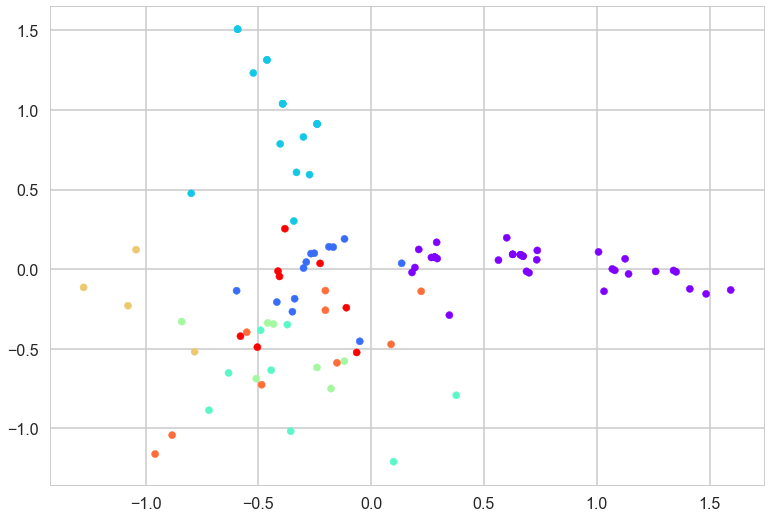

In [948]:
plt.scatter(x=result_x, y=result_y, c=ac.labels_, cmap='rainbow', s=50)
plt.show()

This method produces the highest silhouette score so far at 0.156 for 8 clusters.

### DBSCAN

In [949]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=2, min_samples=5)
dbs_clusters = dbs.fit_predict(x_cols)
clust, count = np.unique(dbs_clusters, return_counts=True)
noise = np.where(dbs.labels_ == -1)
print(zip(clust, count))
print("Silhouette Coefficient: %0.3f" % silhouette_score(x_cols, dbs_clusters))
print ("Noise cluster: ", noise)

[(-1, 3), (0, 97)]
Silhouette Coefficient: 0.235
Noise cluster:  (array([80, 81, 87], dtype=int64),)


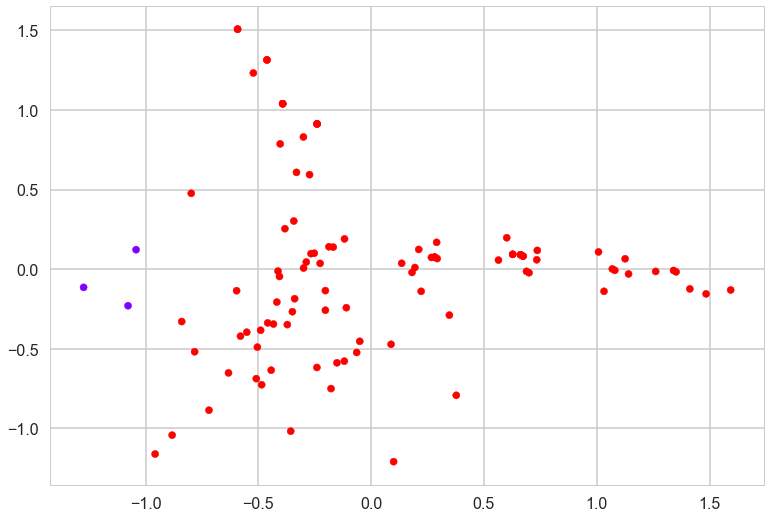

In [950]:
plt.scatter(x=result_x, y=result_y, c=dbs.labels_, cmap='rainbow', s=50)
plt.show()

DBSCAN separates noise from signal and places noisy data in a '-1' cluster in order to produce more closely linked clusters. The best result I was able to obtain for this data set is using eps=2.0, which set aside 3 data points as 'noise' group and left the other 97 in a single cluster, yielding a silhouette score of 0.235. Although this is the best score yet, it does not produce a useful clustering solution other than to identify the outliers (data points indexed 80, 81 and 87) and perform the analysis again with these outliers removed.  